In [4]:
%matplotlib inline
from cox import readers
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set()

In [5]:
r = readers.CollectionReader('../src/kl_sampled_debug/agents')

100%|██████████| 2/2 [00:00<00:00,  6.08it/s]


In [22]:
metadata = r.df('metadata')
opt = r.df('optimization')
opt['opt_step'] = opt.index
#nadv = r.df('normalized_advantage')
#nadv['opt_step'] = (nadv.index % 50) * 10
constraints = r.df('paper_constraints_train')
constraints_heldout = r.df('paper_constraints_heldout')

In [23]:
games = ["HalfCheetah-v2"]
code_level_opts = {
      'kl_closed_form': [False],
      'kl_penalty_direction': ['new_to_old', 'old_to_new']
}

NUM_BINS = 20

In [24]:
key_metadata = metadata[['exp_id', 'game'] + list(code_level_opts.keys())]
constraints = constraints.merge(key_metadata, on='exp_id')
constraints_heldout = constraints_heldout.merge(key_metadata, on='exp_id')
#nadv = nadv.merge(key_metadata, on='exp_id')
opt = opt.merge(key_metadata, on='exp_id')

In [17]:
opt

,mean_reward,final_value_loss,mean_std,exp_id,opt_step,game,kl_closed_form,kl_penalty_direction
0,-691.127792,0.578810,0.998728,41b28f52-f6d0-4d60-91a4-48bd5e0fee9c,0,HalfCheetah-v2,False,new_to_old
1,-764.364285,0.453525,0.994656,41b28f52-f6d0-4d60-91a4-48bd5e0fee9c,1,HalfCheetah-v2,False,new_to_old
2,-713.965406,0.556544,1.003758,41b28f52-f6d0-4d60-91a4-48bd5e0fee9c,2,HalfCheetah-v2,False,new_to_old
3,-611.110727,0.382251,1.001818,41b28f52-f6d0-4d60-91a4-48bd5e0fee9c,3,HalfCheetah-v2,False,new_to_old
4,-683.559803,0.296963,0.995160,41b28f52-f6d0-4d60-91a4-48bd5e0fee9c,4,HalfCheetah-v2,False,new_to_old
...,...,...,...,...,...,...,...,...
1995,-789.312266,0.039909,0.109161,ed47f96e-193e-4bd8-a4d7-28a22764ccb5,995,HalfCheetah-v2,False,old_to_new
1996,-917.692011,0.043301,0.109198,ed47f96e-193e-4bd8-a4d7-28a22764ccb5,996,HalfCheetah-v2,False,old_to_new
1997,-751.681317,0.031841,0.109053,ed47f96e-193e-4bd8-a4d7-28a22764ccb5,997,HalfCheetah-v2,False,old_to_new
1998,-1135.482839,0.062696,0.109607,ed47f96e-193e-4bd8-a4d7-28a22764ccb5,998,HalfCheetah-v2,False,old_to_new


# Plot mean rewards

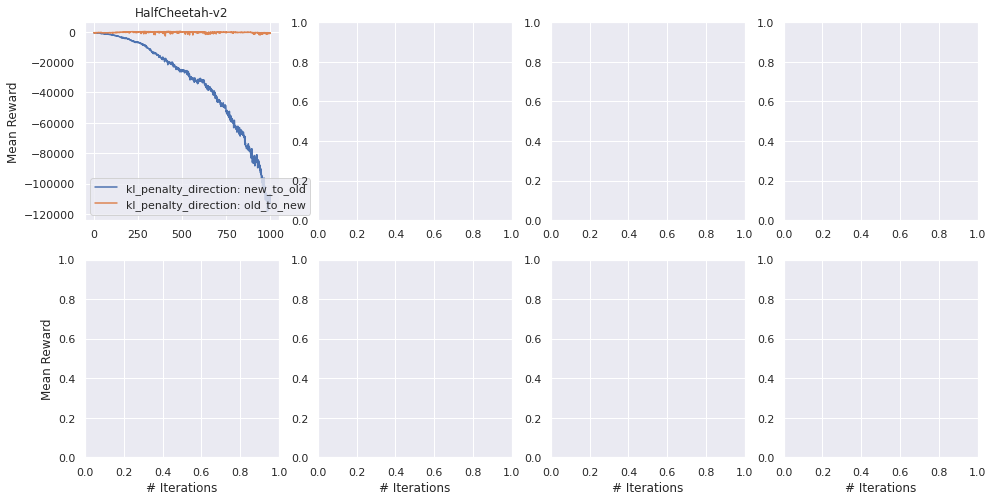

In [21]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    cl_opt = 'kl_penalty_direction'
    for b in code_level_opts[cl_opt]:
        filt = opt[(opt[cl_opt] == b) & (opt.game == g)]
        sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                     ax=ax.flatten()[j], label=f"{cl_opt}: {b}")
    ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
for row in ax:
    row[0].set_ylabel('Mean Reward')
for a in ax[-1]:
    a.set_xlabel('# Iterations')
    
plt.show()

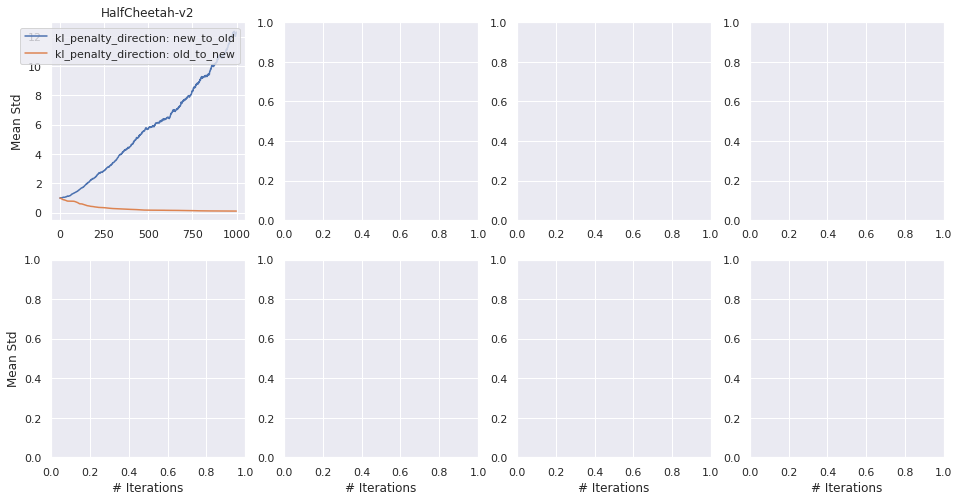

In [29]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    cl_opt = 'kl_penalty_direction'
    for b in code_level_opts[cl_opt]:
        filt = opt[(opt[cl_opt] == b) & (opt.game == g)]
        sns.lineplot(filt.opt_step, filt.mean_std, n_boot=100,
                     ax=ax.flatten()[j], label=f"{cl_opt}: {b}")
    ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
for row in ax:
    row[0].set_ylabel('Mean Std')
for a in ax[-1]:
    a.set_xlabel('# Iterations')
    
plt.show()

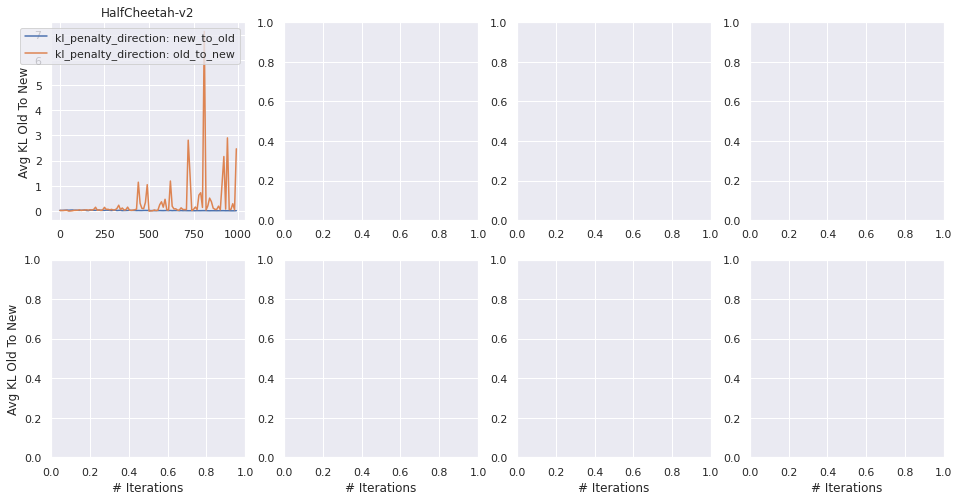

In [27]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    cl_opt = 'kl_penalty_direction'
    for b in code_level_opts[cl_opt]:
        filt = constraints_heldout[(constraints_heldout[cl_opt] == b) & (constraints_heldout.game == g)]
        sns.lineplot(filt.opt_step, filt.avg_kl_old_to_new, n_boot=100,
                     ax=ax.flatten()[j], label=f"{cl_opt}: {b}")
    ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
for row in ax:
    row[0].set_ylabel('Avg KL Old To New')
for a in ax[-1]:
    a.set_xlabel('# Iterations')
    
plt.show()

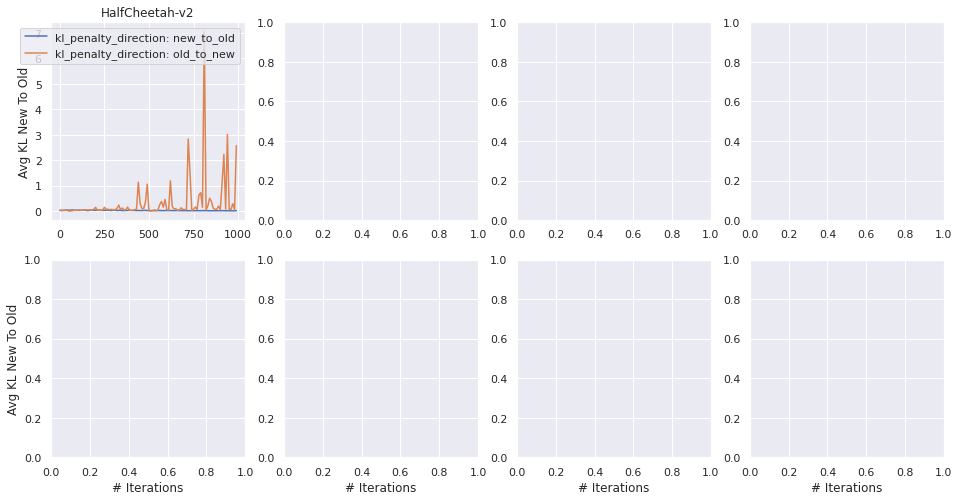

In [28]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    cl_opt = 'kl_penalty_direction'
    for b in code_level_opts[cl_opt]:
        filt = constraints_heldout[(constraints_heldout[cl_opt] == b) & (constraints_heldout.game == g)]
        sns.lineplot(filt.opt_step, filt.avg_kl_new_to_old, n_boot=100,
                     ax=ax.flatten()[j], label=f"{cl_opt}: {b}")
    ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
for row in ax:
    row[0].set_ylabel('Avg KL New To Old')
for a in ax[-1]:
    a.set_xlabel('# Iterations')
    
plt.show()